In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [237]:
detection_distance = 100
safe_distance = 2

In [251]:
def dist(d1,d2):
    check = np.linalg.norm((d1[0]-d2[0],d1[1]-d2[1]))
    return min(check,10)


In [387]:
def vector(d1_pos, d2_pos, d1_p, d2_p):
    angle = np.arctan2(d2_pos[1]-d1_pos[1],d2_pos[0]-d1_pos[0])
    curvec = ((d2_p/d1_p)**2)*np.array([np.cos(angle), np.sin(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2
    tangvec = ((d2_p/d1_p)**2)*np.array([np.sin(angle),-np.cos(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2
    vec = -10*(tangvec+curvec)
    

    return vec

/tmp/ipykernel_240364/2046123784.py:3: RuntimeWarning: divide by zero encountered in true_divide
  curvec = ((d2_p/d1_p)**2)*np.array([np.cos(angle), np.sin(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2
/tmp/ipykernel_240364/2046123784.py:3: RuntimeWarning: invalid value encountered in true_divide
  curvec = ((d2_p/d1_p)**2)*np.array([np.cos(angle), np.sin(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2
/tmp/ipykernel_240364/2046123784.py:4: RuntimeWarning: divide by zero encountered in true_divide
  tangvec = ((d2_p/d1_p)**2)*np.array([np.sin(angle),-np.cos(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2
/tmp/ipykernel_240364/2046123784.py:4: RuntimeWarning: invalid value encountered in true_divide
  tangvec = ((d2_p/d1_p)**2)*np.array([np.sin(angle),-np.cos(angle)])/np.linalg.norm((d2_pos[0]-d1_pos[0], d2_pos[1]-d1_pos[1]))**2


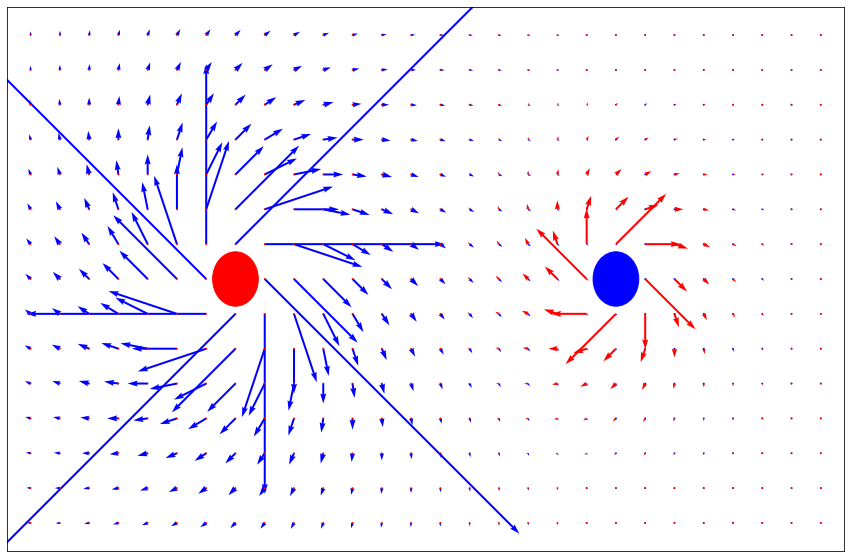

In [408]:

uav1_position = (5,5)
uav2_position = (10,5)

uav1_priority = 5
uav2_priority = 5

x = np.linspace(0,15,40)
y= np.linspace(0,15,40)
X,Y = np.meshgrid(x,y)

u,v = np.meshgrid(x,y)
p,q = np.meshgrid(x, y)
for i in range(len(X)):
    for j in range(len(Y)):
        vec = vector((X[i][j],Y[i][j]),uav1_position, 2,3)
        u[i][j] = vec[0]
        v[i][j] = vec[1]

for i in range(len(X)):
    for j in range(len(Y)):
        vec = vector( (X[i][j],Y[i][j]), uav2_position,3,2)
        p[i][j] = vec[0]
        q[i][j] = vec[1]

# fulmax = max(np.linalg.norm((u[20][20],v[20,20])), np.linalg.norm((p[20][20],q[20][20])))
# u=u/fulmax
# v=v/fulmax
# p=p/fulmax
# q=q/fulmax

fig, ax = plt.subplots(1,figsize=(15,10))
uav1_circle = plt.Circle(uav1_position, 0.3 , color='red')
uav2_circle = plt.Circle(uav2_position, 0.3, color='blue')

ax.add_patch(uav1_circle)
ax.add_patch(uav2_circle)

ax.set_xlim(2,13)
ax.set_ylim(2,8)
# u[np.sqrt(u**2 + v**2) > 70] = 0
# v[np.sqrt(u**2 + v**2) > 70] = 0
# p[np.sqrt(p**2 + q**2) > 70] = 0
# q[np.sqrt(p**2 + q**2) > 70] = 0

ax.quiver(x,y,u,v, color='blue', pivot='tail',scale=5*10**2)
ax.quiver(x,y,p,q, color='red', pivot='tail',scale=5*10**2)

ax.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)



fig.savefig('/media/storage/agam/drone_launch/gradient plots/same_priority.eps')


plt.show()
